<a href="https://colab.research.google.com/github/someshugar445/Bike_Rental_Count_Predection/blob/master/Finalmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [111]:
# Import all the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error
import seaborn as sns
from sklearn.metrics import accuracy_score
import os
from sklearn.metrics import mean_squared_error, r2_score
import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [112]:
# Read file  using pandas and check shape
df = pd.read_csv("day.csv", index_col=0)
print(df.shape)

(731, 15)


In [113]:
# View and analyse head of the Dataframe
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [114]:
# Date time conversion
df.dteday = pd.to_datetime(df.dteday, format='%Y-%m-%d')

In [115]:
df['hr'] = df['dteday'].dt.hour

In [116]:
# df['day'] = df['dteday'].dt.day
df.drop('dteday',axis=1,inplace=True)

In [117]:
df.dtypes

season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
hr              int64
dtype: object

In [118]:
# Find columns with NaN
df.isnull().sum(axis=0)

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
hr            0
dtype: int64

In [119]:

# categorical variables
df['season'] = df.season.astype('category')
df['holiday'] = df.holiday.astype('category')
df['weekday'] = df.weekday.astype('category')
df['weathersit'] = df.weathersit.astype('category')
df['workingday'] = df.workingday.astype('category')
df['mnth'] = df.mnth.astype('category')
df['yr'] = df.yr.astype('category')
df['hr'] = df.hr.astype('category')

In [120]:
df.drop(['casual','registered'],axis=1,inplace=True)

In [121]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,hr
instant,,,,,,,,,,,,,
1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985,0
2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801,0
3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349,0
4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562,0
5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600,0


In [122]:
# Exploratory Data Analysis

# Bike sharing utilization over the two years
# The objective of this Case is to Predication of bike rental count on daily based on the environmental and seasonal settings.

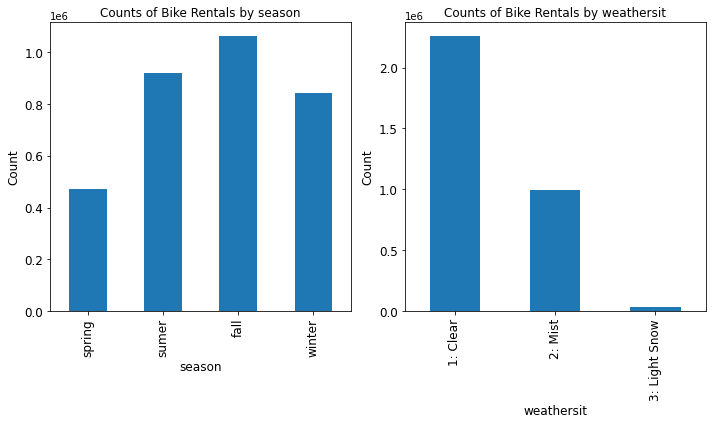

In [123]:
f,  (ax1, ax2)  =  plt.subplots(nrows=1, ncols=2, figsize=(10, 6))

ax1 = df[['season','cnt']].groupby(['season']).sum().reset_index().plot(kind='bar',
                                       legend = False, title ="Counts of Bike Rentals by season", 
                                         stacked=True, fontsize=12, ax=ax1)
ax1.set_xlabel("season", fontsize=12)
ax1.set_ylabel("Count", fontsize=12)
ax1.set_xticklabels(['spring','sumer','fall','winter'])

 
ax2 = df[['weathersit','cnt']].groupby(['weathersit']).sum().reset_index().plot(kind='bar',  
      legend = False, stacked=True, title ="Counts of Bike Rentals by weathersit", fontsize=12, ax=ax2)

ax2.set_xlabel("weathersit", fontsize=12)
ax2.set_ylabel("Count", fontsize=12)
ax2.set_xticklabels(['1: Clear','2: Mist','3: Light Snow'])

f.tight_layout()

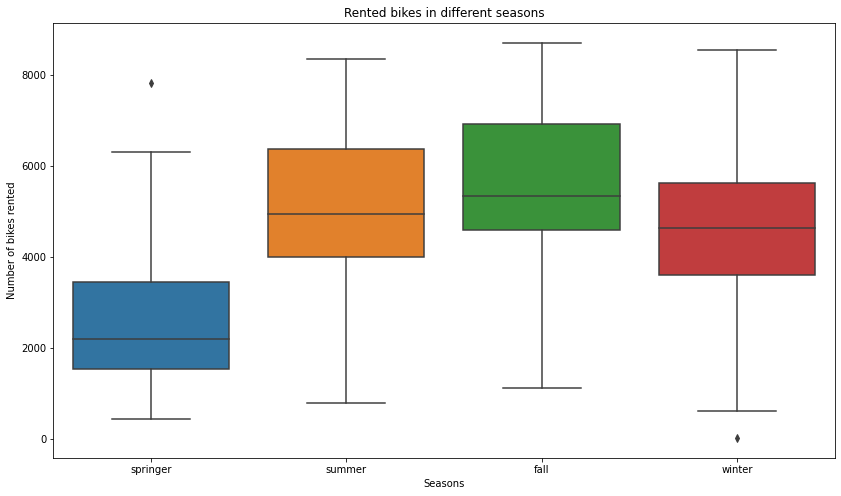

In [124]:
# Box plot of Rented bikes in different seasons
fig, ax = plt.subplots(figsize=(14,8))
fig = sns.boxplot(x='season', y='cnt', data=df, ax=ax)
ax.set(xlabel='Seasons', ylabel='Number of bikes rented', title='Rented bikes in different seasons')
seasons=['springer','summer', 'fall', 'winter']
ax.set_xticklabels(seasons)
plt.savefig('Figure2.png')
plt.show()

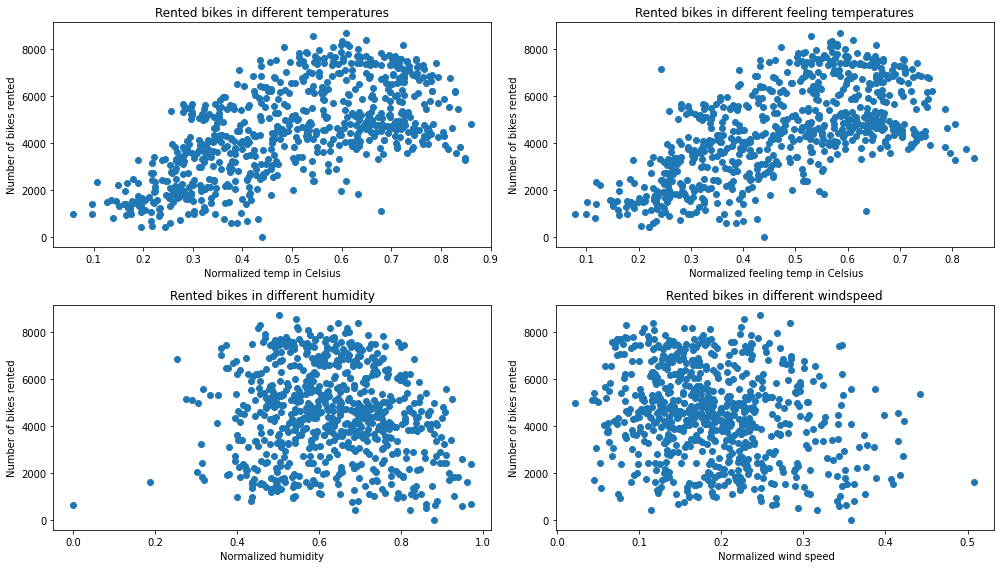

In [125]:
fig= plt.subplots(figsize=(14,8))
axes1 = plt.subplot(2, 2, 1)
axes2 = plt.subplot(2, 2, 2)
axes3 = plt.subplot(2, 2, 3)
axes4 = plt.subplot(2, 2, 4)

axes1.scatter(x='temp', y='cnt', data=df)
axes2.scatter(x='atemp', y='cnt', data=df)
axes3.scatter(x='hum', y='cnt', data=df)
axes4.scatter(x='windspeed', y='cnt', data=df)

axes1.set(xlabel='Normalized temp in Celsius', ylabel='Number of bikes rented', title='Rented bikes in different temperatures')
axes2.set(xlabel=' Normalized feeling temp in Celsius', ylabel='Number of bikes rented', title='Rented bikes in different feeling temperatures')
axes3.set(xlabel='Normalized humidity', ylabel='Number of bikes rented', title='Rented bikes in different humidity')
axes4.set(xlabel=' Normalized wind speed', ylabel='Number of bikes rented', title='Rented bikes in different windspeed')
plt.tight_layout()
plt.savefig('Figure7.png')
plt.show()

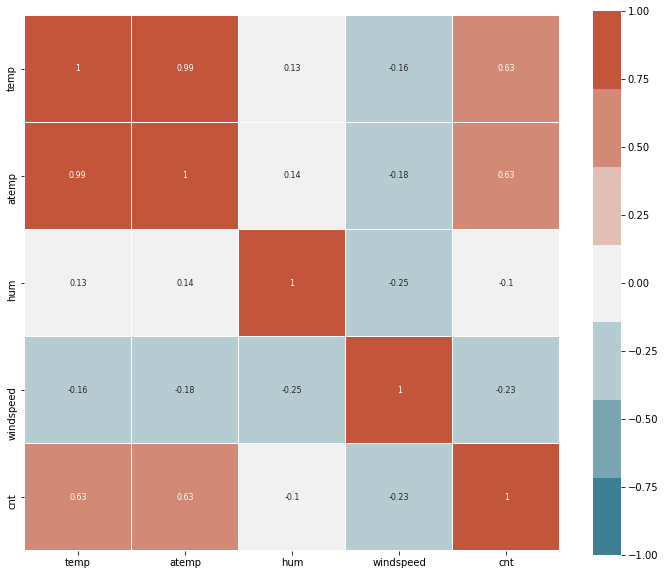

In [126]:
plt.figure(figsize=(12, 10)) 
sns.heatmap(df.corr(),             
cmap=sns.diverging_palette(220, 20, n=7), vmax=1.0, vmin=-1.0, linewidths=0.1, 
annot=True, annot_kws={"size": 8}, square=True) 
plt.savefig('Figure8.png') 
plt.show()

In [127]:
#Feature Engineering
# Defining categorical variables encoder method
def fit_transform_ohe(df,col_name):
    # label encode the column
    le = preprocessing.LabelEncoder()
    le_labels = le.fit_transform(df[col_name])
    df[col_name+'_label'] = le_labels
    # one hot encoding
    ohe = preprocessing.OneHotEncoder()
    feature_arr = ohe.fit_transform(df[[col_name+'_label']]).toarray()
    feature_labels = [col_name+'_'+str(cls_label) for cls_label in le.classes_]
    features_df = pd.DataFrame(feature_arr, columns=feature_labels)
    return le,ohe,features_df

# given label encoder and one hot encoder objects, 
# encode attribute to ohe
def transform_ohe(df,le,ohe,col_name):
    # label encode
    col_labels = le.transform(df[col_name])
    df[col_name+'_label'] = col_labels
    
    # ohe 
    feature_arr = ohe.fit_transform(df[[col_name+'_label']]).toarray()
    feature_labels = [col_name+'_'+str(cls_label) for cls_label in le.classes_]
    features_df = pd.DataFrame(feature_arr, columns=feature_labels)
    
    return features_df
# Divide the dataset into training and testing sets
X, X_test, y, y_test = train_test_split(df.drop('cnt',axis=1),
                                        df['cnt'],
                                        test_size=0.33,
                                        random_state=42)
X.reset_index(inplace=True)
y = y.reset_index()

X_test.reset_index(inplace=True)
y_test = y_test.reset_index()
# Encoding all the categorical features
cat_attr_list = ['season','holiday',
                 'weathersit','workingday',
                 'hr','weekday','mnth','yr']
# though we have transformed all categoricals into their one-hot encodings, note that ordinal
# attributes such as hour, weekday, and so on do not require such encoding.
numeric_feature_cols = ['temp','hum','windspeed',
                        'hr','weekday','mnth','yr']
subset_cat_features =  ['season','holiday','weathersit','workingday']

###############
# Train dataset
###############
encoded_attr_list = []
for col in cat_attr_list:
    return_obj = fit_transform_ohe(X,col)
    encoded_attr_list.append({'label_enc':return_obj[0],
                              'ohe_enc':return_obj[1],
                              'feature_df':return_obj[2],
                              'col_name':col})


feature_df_list  = [X[numeric_feature_cols]]
feature_df_list.extend([enc['feature_df'] \
                        for enc in encoded_attr_list \
                        if enc['col_name'] in subset_cat_features])

train_df_new = pd.concat(feature_df_list, axis=1)
print("Train dataset shape::{}".format(train_df_new.shape))

##############
# Test dataset
##############
test_encoded_attr_list = []
for enc in encoded_attr_list:
    col_name = enc['col_name']
    le = enc['label_enc']
    ohe = enc['ohe_enc']
    test_encoded_attr_list.append({'feature_df':transform_ohe(X_test,
                                                              le,ohe,
                                                              col_name),
                                   'col_name':col_name})
    
    
test_feature_df_list = [X_test[numeric_feature_cols]]
test_feature_df_list.extend([enc['feature_df'] \
                             for enc in test_encoded_attr_list \
                             if enc['col_name'] in subset_cat_features])

test_df_new = pd.concat(test_feature_df_list, axis=1) 
print("Test dataset shape::{}".format(test_df_new.shape))

Train dataset shape::(489, 18)
Test dataset shape::(242, 18)


In [128]:
test_df_new.columns

Index(['temp', 'hum', 'windspeed', 'hr', 'weekday', 'mnth', 'yr', 'season_1',
       'season_2', 'season_3', 'season_4', 'holiday_0', 'holiday_1',
       'weathersit_1', 'weathersit_2', 'weathersit_3', 'workingday_0',
       'workingday_1'],
      dtype='object')

In [129]:
train_df_new.columns

Index(['temp', 'hum', 'windspeed', 'hr', 'weekday', 'mnth', 'yr', 'season_1',
       'season_2', 'season_3', 'season_4', 'holiday_0', 'holiday_1',
       'weathersit_1', 'weathersit_2', 'weathersit_3', 'workingday_0',
       'workingday_1'],
      dtype='object')

In [130]:
# Constructing train dataset
X_train = train_df_new
y_train= y

# Constructing test dataset
X_test = test_df_new
y_test = y_test
print(X.shape,y.shape)

(489, 21) (489, 2)


# LinearRegression Model

In [131]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [132]:
print("R-Squared on train dataset={}".format(model.score(X_test,y_test)))

model.fit(X_test,y_test)   
print("R-Squaredon test dataset={}".format(model.score(X_test,y_test)))

R-Squared on train dataset=0.9207619875183328
R-Squaredon test dataset=0.9245959481158825


In [133]:
rmse = sqrt(mean_squared_error(y_test, y_pred))
print("RMSE =", rmse)
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))


RMSE = 551.9320707319453
Variance score: 0.92


In [134]:
# The coefficients
print('Coefficients: \n', model.coef_)



Coefficients: 
 [[ 1.06007923e-01  7.39619902e+00  1.59248075e+01 -7.99360578e-15
  -2.43887161e-01  3.06198593e+01  3.66484565e+02 -8.69938795e-02
  -4.72269779e-01  2.90903982e-01  2.68359677e-01  1.02202601e+00
  -1.02202601e+00  1.72369808e+00  2.79357024e-01 -2.00305511e+00
   4.83193730e-01 -4.83193730e-01]
 [ 4.67193634e+03 -1.35872531e+03 -2.81291277e+03  9.76285719e-12
   7.16063233e+01  4.52804768e+00  2.13027914e+03 -9.40380362e+02
   2.49482413e+02  7.81397184e+01  6.12758231e+02  3.16861829e+02
  -3.16861829e+02  8.02889616e+02  4.95035586e+02 -1.29792520e+03
  -3.08807112e+01  3.08807112e+01]]


In [135]:
from sklearn.metrics import mean_squared_log_error
def rmsle(y_test,predictions):
    return np.sqrt(mean_squared_log_error( y_test, predictions ))

# RandomForestRegressor Model

In [136]:
from sklearn.ensemble import RandomForestRegressor
RFmodel = RandomForestRegressor()

In [137]:
RFmodel.fit(X_train, y_train)
RF_y_pred = RFmodel.predict(X_test)



In [138]:

rmse = sqrt(mean_squared_error(y_test, RF_y_pred))
print("RMSE =",rmse)
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, RF_y_pred))
print("RMSLE: ",np.sqrt(mean_squared_log_error( y_test, RF_y_pred )))

RMSE = 457.63329223289395
Variance score: 0.93
RMSLE:  0.3127257949610742


# DecisionTreeRegressor Model

In [139]:
DT_model = DecisionTreeRegressor()
DT_model.fit(X_train, y_train)
DT_y_pred = DT_model.predict(X_test)   

In [140]:
rmse = sqrt(mean_squared_error(y_test, DT_y_pred))
print("RMSE =", rmse)
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, DT_y_pred))
print("RMSLE: ",np.sqrt(mean_squared_log_error( y_test, DT_y_pred )))

RMSE = 621.4298727747641
Variance score: 0.82
RMSLE:  0.4173264028311839


In [141]:
# Hyperparameter tuning with GridSearchCV
from sklearn.model_selection import GridSearchCV
param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }

## Comment in order to publish in kaggle.

grid_cv_dtm = GridSearchCV(DT_model, param_grid, cv=5)

grid_cv_dtm.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 6, 8],
                         'max_leaf_nodes': [5, 20, 100],
                         'min_samples_leaf': [20, 40, 100],
                         'min_samples_split': [10, 20, 40]})

In [142]:
print("R-Squared::{}".format(grid_cv_dtm.best_score_))
print("Best Hyperparameters::\n{}".format(grid_cv_dtm.best_params_))

R-Squared::0.7814933887950334
Best Hyperparameters::
{'criterion': 'mae', 'max_depth': 6, 'max_leaf_nodes': 20, 'min_samples_leaf': 20, 'min_samples_split': 10}


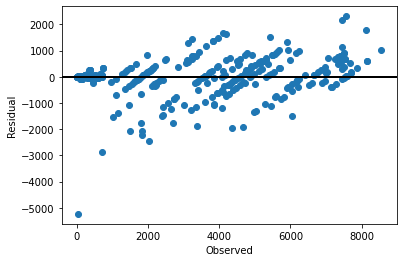

In [143]:
# Evaluating training model
predicted = grid_cv_dtm.best_estimator_.predict(X_test)
residuals = y_test-predicted

fig, ax = plt.subplots()
ax.scatter(y_test, residuals)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
plt.show()

In [144]:
rmse = sqrt(mean_squared_error(y_test, predicted))
print("RMSE =", rmse)
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, predicted))
print("RMSLE: ",np.sqrt(mean_squared_log_error( y_test, predicted )))

RMSE = 618.3055407608258
Variance score: 0.86
RMSLE:  0.36679453889655633
